<a href="https://colab.research.google.com/github/rafaignaulin/artificial_intelligence/blob/main/Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=1c2ccc2b7847aa0b27b42b06391795e9e8b4e8eee2335a338bc7eb14a6f1d4ce
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

In [ ]:
spark = SparkSession.builder.appName("Teste").getOrCreate()

In [ ]:
df = spark.read.option("header", "True").csv('/content/Iris.csv')

In [ ]:
df = df.drop('id')

In [ ]:
df.describe().show()

+-------+------------------+-------------------+------------------+------------------+--------------+
|summary|     SepalLengthCm|       SepalWidthCm|     PetalLengthCm|      PetalWidthCm|       Species|
+-------+------------------+-------------------+------------------+------------------+--------------+
|  count|               150|                150|               150|               150|           150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|          null|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|          null|
|    min|               4.3|                2.0|               1.0|               0.1|   Iris-setosa|
|    max|               7.9|                4.4|               6.9|               2.5|Iris-virginica|
+-------+------------------+-------------------+------------------+------------------+--------------+



In [ ]:
df.select(f.col('Species')).distinct().show()

+---------------+
|        Species|
+---------------+
| Iris-virginica|
|    Iris-setosa|
|Iris-versicolor|
+---------------+



#KNN ( K Nearest Neighbours)

In [ ]:
dfp = df.toPandas()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importa o knn
from sklearn.neighbors import KNeighborsClassifier
# importa o módulo de métricas
from sklearn import metrics
# importa a função auxiliar para fazer a divisao dos dados
from sklearn.model_selection import train_test_split
# importa o encoder para transformar as classes em texto em números
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
dfp['Species_num'] = le.fit_transform(dfp.Species)

In [ ]:
dfp

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [ ]:
x = dfp.drop(['Species', 'Species_num'], axis=1, )

In [ ]:
y = dfp['Species_num']

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=43)

In [ ]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(120, 4) (30, 4) (120,) (30,)


In [ ]:
knn = KNeighborsClassifier()

In [ ]:
model = knn.fit(Xtrain, Ytrain)

In [ ]:
y_pred = model.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Acuracia:", accuracy_score(Ytest, y_pred))

Acuracia: 1.0


In [ ]:
print(classification_report(Ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print(confusion_matrix(Ytest, y_pred))

[[13  0  0]
 [ 0  8  0]
 [ 0  0  9]]


In [ ]:

from yellowbrick.classifier import ConfusionMatrix, roc_auc

In [ ]:
cm = ConfusionMatrix(model)

/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


1.0

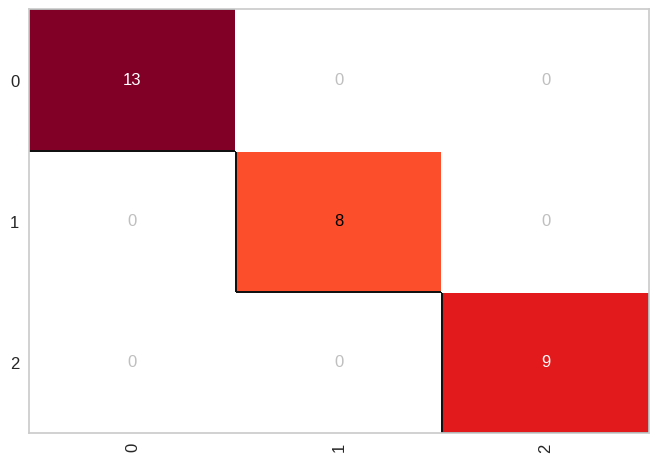

In [ ]:
cm.score(Xtest, Ytest)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


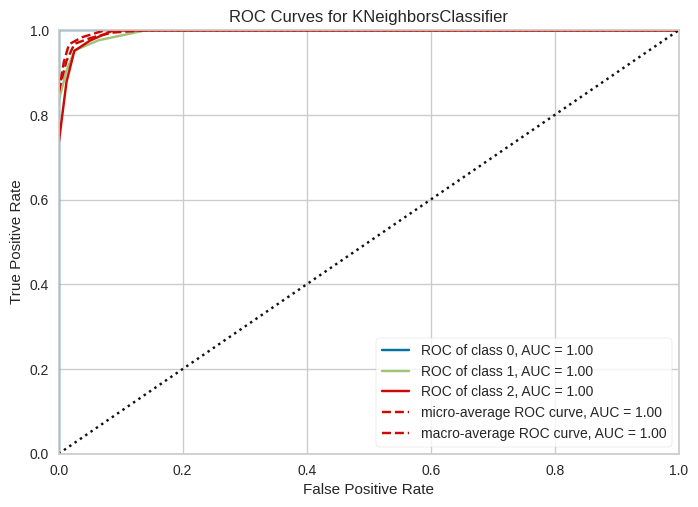

In [ ]:
roc = roc_auc(knn, Xtrain, Ytrain)